In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np 

In [3]:
with open("../data/nietzsche.txt", "r", encoding="utf8") as f:
    text = f.read().lower()

print(len(text))

600901


In [4]:
lines = text.split("\n")

tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)
num_words = len(tokenizer.word_index) + 1

In [5]:
print(lines[3])
tokenizer.texts_to_sequences([lines[3]])[0]

supposing that truth is a woman--what then? is there not ground


[573, 8, 116, 6, 7, 145, 40, 141, 6, 39, 14, 1014]

In [7]:
input_sequences = []

for line in lines:
    tokens = tokenizer.texts_to_sequences([line])[0]

    for i in range(1, len(tokens)):
        input_sequences.append(tokens[:i+1])

In [8]:
input_sequences[0]

[573, 8]

In [9]:
max_sequence_len = max([len(i) for i in input_sequences])

In [10]:
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [11]:
np.random.shuffle(input_sequences)
X, y = input_sequences[:,:-1], np.expand_dims(input_sequences[:,-1], axis=1)

In [12]:
X.shape

(92321, 16)

In [13]:
y.shape

(92321, 1)

In [14]:
num_words

10262

In [15]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

emb_size = 256

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, emb_size, input_length=max_sequence_len - 1),
    tf.keras.layers.LSTM(120),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256),
    tf.keras.layers.Dense(units=num_words, activation='softmax')
]) 

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer="adam", metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 16, 256)           2627072   
_________________________________________________________________
lstm (LSTM)                  (None, 120)               180960    
_________________________________________________________________
dropout (Dropout)            (None, 120)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               30976     
_________________________________________________________________
dense_1 (Dense)              (None, 10262)             2637334   
Total params: 5,476,342
Trainable params: 5,476,342
Non-trainable params: 0
_________________________________________________________________


In [16]:
plot_model(model, show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [17]:
callback = EarlyStopping(monitor="loss", patience=3)
history = model.fit(X, y, epochs=50, batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/50
722/722 [==============================] - 33s 43ms/step - loss: 6.9644 - accuracy: 0.0686
Epoch 2/50
722/722 [==============================] - 31s 42ms/step - loss: 6.0720 - accuracy: 0.1154
Epoch 3/50
722/722 [==============================] - 29s 40ms/step - loss: 5.7621 - accuracy: 0.1375
Epoch 4/50
722/722 [==============================] - 26s 36ms/step - loss: 5.5113 - accuracy: 0.1549
Epoch 5/50
722/722 [==============================] - 26s 36ms/step - loss: 5.2864 - accuracy: 0.1670
Epoch 6/50
722/722 [==============================] - 26s 36ms/step - loss: 5.0568 - accuracy: 0.1810
Epoch 7/50
722/722 [==============================] - 26s 36ms/step - loss: 4.8327 - accuracy: 0.1917
Epoch 8/50
722/722 [==============================] - 26s 36ms/step - loss: 4.5690 - accuracy: 0.2107
Epoch 9/50
722/722 [==============================] - 26s 36ms/step - loss: 4.3070 - accuracy: 0.2323
Epoch 10/50
722/722 [==============================] - 26s 36ms/step - loss: 4.062

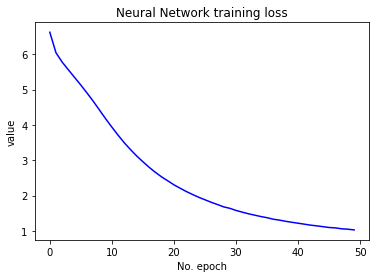

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='(training data)',color='blue')
plt.title('Neural Network training loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.show()

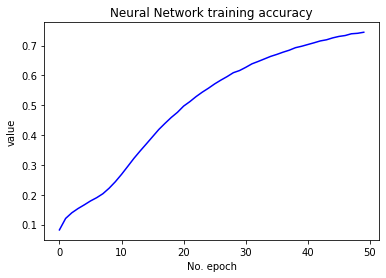

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='(training data)',color='blue')
plt.title('Neural Network training accuracy')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.show()

In [20]:
import sys

text = "The philosophy of the dogmatists, it is to be hoped, was only a promise for thousands of years afterwards"
next_words = 100

print(text)
for _ in range(next_words):
    tokens = tokenizer.texts_to_sequences([text])[0]
    tokens = pad_sequences([tokens], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(tokens, verbose=0), axis=-1)
 
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break

    sys.stdout.write(output_word + " ")
    text += " " + output_word

The philosophy of the dogmatists, it is to be hoped, was only a promise for thousands of years afterwards
as was a dangerous and more subtle puzzles to believe in the soul of the most unrestricted is the great thing what is left to us besides this has not you made some sin among the serene totality of which work be the obeying parties and as the epicurean god has been previously without it the little eye for the one has learnt unawares something for a good thing which in a sublime and ambitious thirst for vengeance indifferently he craves under the jews he would have been told you it addresses to the stoic a own form and can 